In [1]:
# Import modules for this project
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load iris dataset
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# Training testing split
res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# Classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

# Print some interested metrics
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

# Re-do KNN using some specific parameters.
knn2 = KNeighborsClassifier(algorithm='auto',
                            leaf_size=30,
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None,
                            n_jobs=1,
                            n_neighbors=5,
                            weights='uniform')

knn.fit(train_data, train_labels)
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)

Predictions from the classifier:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
0.975


0.9666666666666667

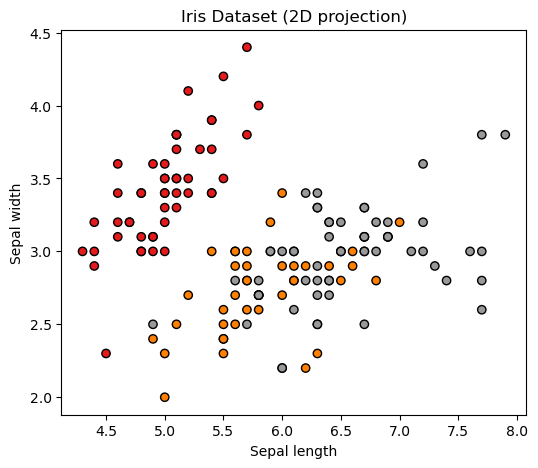

In [2]:
# Plot iris dataset
plt.figure(figsize=(6, 5))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Iris Dataset (2D projection)")
plt.show()




SIMULATED DATASET RESULTS
Training Accuracy: 0.9416666666666667
Test Accuracy: 0.9
Simulated KNN (explicit params) Test Accuracy: 0.9


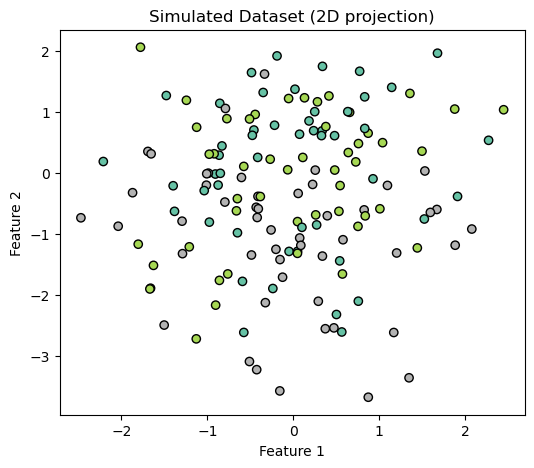

In [3]:
# Synthetic dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


sim_data, sim_labels = datasets.make_classification(
    n_samples=150,
    n_features=4,
    n_informative=3,
    n_redundant=0,
    n_classes=3,
    random_state=42
)

# Split into train/test
train_data, test_data, train_labels, test_labels = train_test_split(
    sim_data, sim_labels, train_size=0.8, test_size=0.2, random_state=12
)

# Train KNN on synthetic dataset
knn2 = KNeighborsClassifier(n_neighbors=5, p=2, weights='uniform')
knn2.fit(train_data, train_labels)

# Predictions
train_pred2 = knn2.predict(train_data)
test_pred2 = knn2.predict(test_data)

print("\nSIMULATED DATASET RESULTS")
print("Training Accuracy:", accuracy_score(train_pred2, train_labels))
print("Test Accuracy:", accuracy_score(test_pred2, test_labels))

# Re-do KNN with explicit parameters for simulated dataset
knn2 = KNeighborsClassifier(
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    n_jobs=1,
    n_neighbors=5,
    weights='uniform'
)
knn2.fit(train_data, train_labels)
test_pred2 = knn2.predict(test_data)
print("Simulated KNN (explicit params) Test Accuracy:", accuracy_score(test_pred2, test_labels))


# Plot simulated dataset (first 2 features)
plt.figure(figsize=(6, 5))
plt.scatter(sim_data[:, 0], sim_data[:, 1], c=sim_labels, cmap=plt.cm.Set2, edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Simulated Dataset (2D projection)")
plt.show()

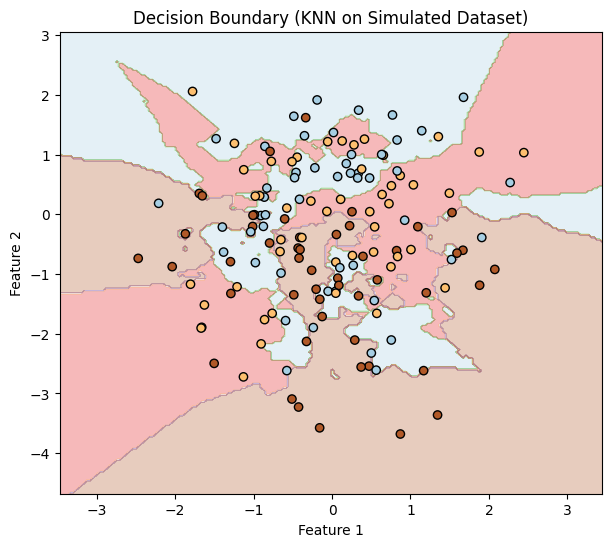

In [6]:
# Decision boundary for simulated data
import numpy as np

# Only first 2 features for plotting decision boundaries
X_plot = sim_data[:, :2]
y_plot = sim_labels

# Train KNN on reduced feature set
knn_plot = KNeighborsClassifier(n_neighbors=5)
knn_plot.fit(X_plot, y_plot)

# Create mesh grid
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on grid
Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=plt.cm.Paired, edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary (KNN on Simulated Dataset)")
plt.show()